In [1]:
import numpy as np
import bagpy
from bagpy import bagreader
import pandas as pd
# import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import glob
import yaml
import matplotlib.pyplot as plt

from plot_track import plot_track

In [2]:
bag_1 = bagreader('mpc_mhe_tunnel.bag')
bag_2 = bagreader('Good Bags/20_26_51_2024-03-20-20-26-51.bag')
bag_3 = bagreader('Good Bags/20_28_45_2024-03-20-20-28-45.bag')
bag_4 = bagreader('Good Bags/20_29_48_2024-03-20-20-29-48.bag')
bag_5 = bagreader('Good Bags/20_41_29_2024-03-20-20-41-29.bag')
bag_6 = bagreader('Good Bags/20_47_22_2024-03-20-20-47-22.bag')

bags = [bag_1, bag_2, bag_3, bag_4, bag_5, bag_6]

[INFO]  Data folder mpc_mhe_tunnel already exists. Not creating.
[INFO]  Data folder Good Bags/20_26_51_2024-03-20-20-26-51 already exists. Not creating.
[INFO]  Data folder Good Bags/20_28_45_2024-03-20-20-28-45 already exists. Not creating.
[INFO]  Data folder Good Bags/20_29_48_2024-03-20-20-29-48 already exists. Not creating.
[INFO]  Data folder Good Bags/20_41_29_2024-03-20-20-41-29 already exists. Not creating.
[INFO]  Data folder Good Bags/20_47_22_2024-03-20-20-47-22 already exists. Not creating.


### Plot Lighthouse Data

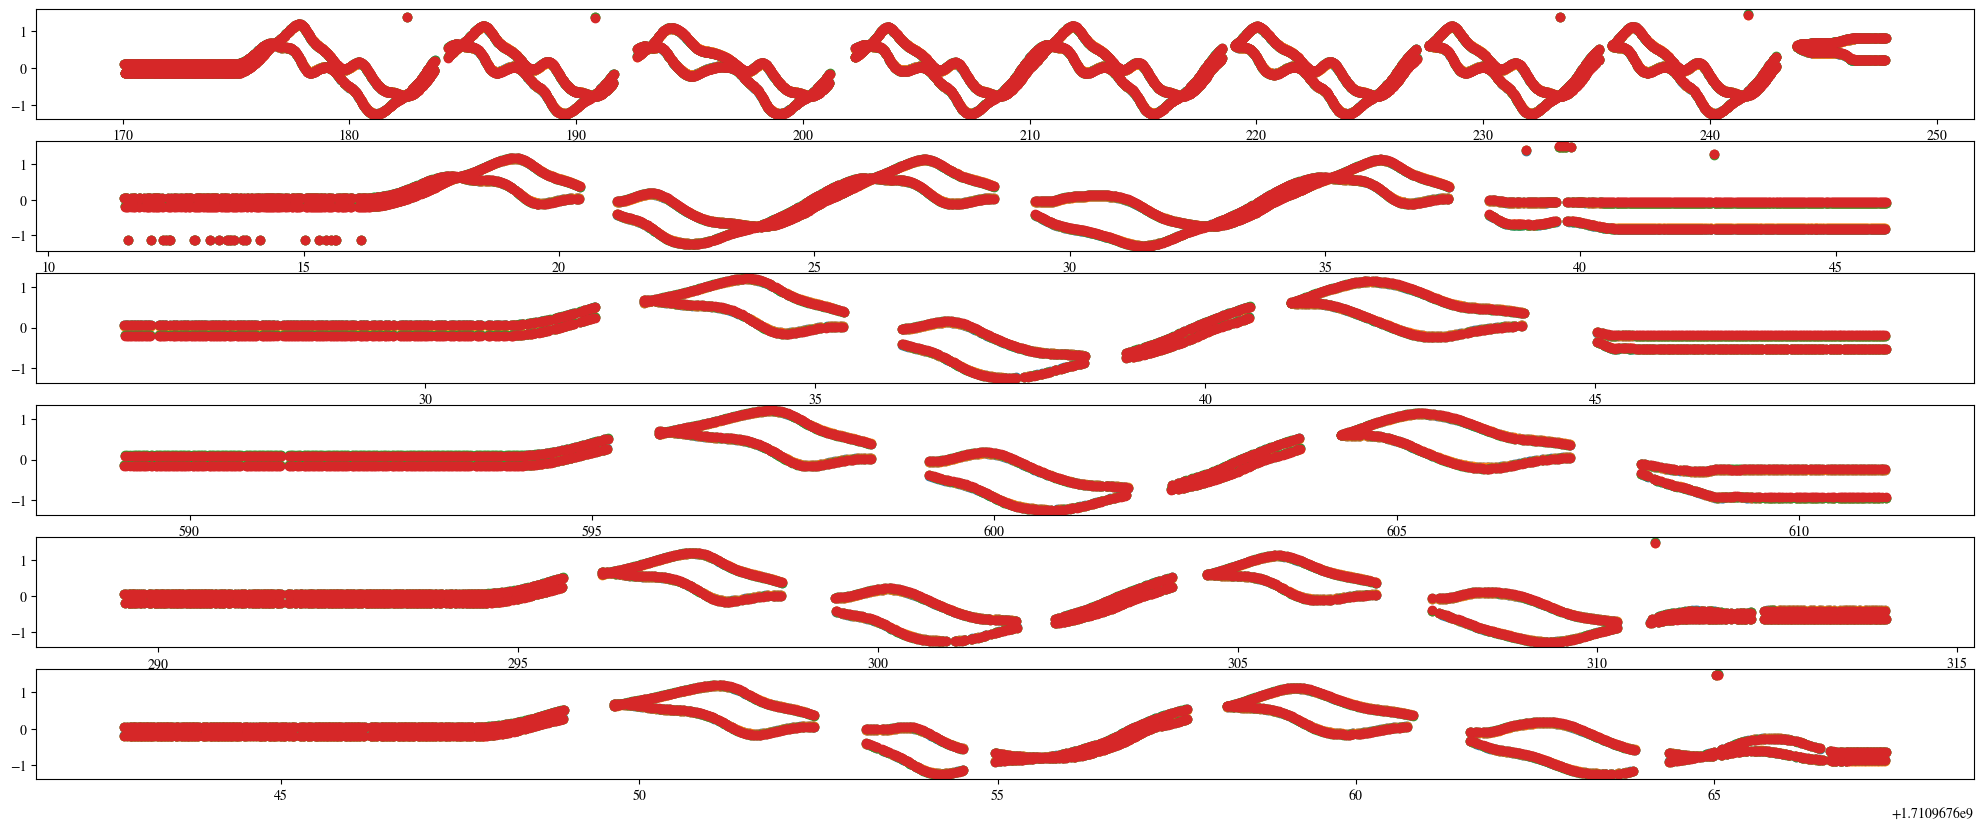

In [3]:
fig, ax = plt.subplots(len(bags), 1)
fig.set_figheight(10)
fig.set_figwidth(25)
start_ts = 0
end_ts = -1

for idx, bag in enumerate(bags):
    lh_msg = bag.message_by_topic('/PAPER/lighthouse')
    df_lh = pd.read_csv(lh_msg)

    ax[idx].plot(df_lh['Time'][start_ts:end_ts], df_lh['angle_0'][start_ts:end_ts], 'o', label = "Angle 1") 
    ax[idx].plot(df_lh['Time'][start_ts:end_ts], df_lh['angle_1'][start_ts:end_ts], 'o', label = "Angle 2") 
    ax[idx].plot(df_lh['Time'][start_ts:end_ts], df_lh['angle_2'][start_ts:end_ts], 'o', label = "Angle 3") 
    ax[idx].plot(df_lh['Time'][start_ts:end_ts], df_lh['angle_3'][start_ts:end_ts], 'o', label = "Angle 4") 

### Plot Estimate

Processing file 1 of 1 file name: ./DEMO_TRACK.yaml
Saved to bag_1.png


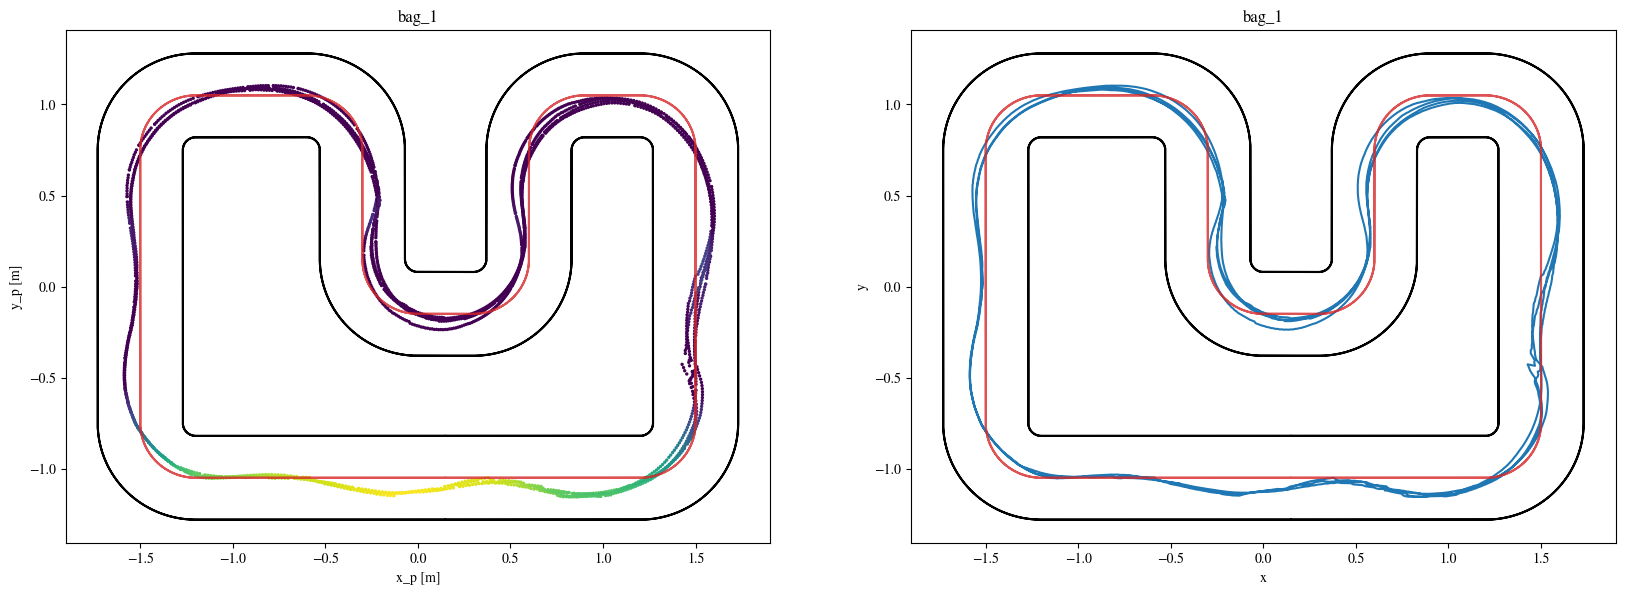

In [4]:
start_ts = 4000
end_ts = 7000

bag = bag_1

for idx, bag in enumerate([bags[0],bags[1]]):
    lh_msg = bag.message_by_topic('/PAPER/lighthouse')
    df_lh = pd.read_csv(lh_msg)
    est_msg = bag.message_by_topic('/PAPER/estimation_node/best_state')
    df_est = pd.read_csv(est_msg)
    
    Ts = df_lh.Time.to_numpy()
    
    valid = []
    for t in df_est.Time.to_numpy():
        valid.append(np.min((Ts - t)**2) < 0.01025)
    valid = np.array(valid)
    
    color = df_est.vx_w[start_ts:end_ts]
    # color = valid[start_ts:end_ts]
    x = df_est.x[start_ts:end_ts]
    y = df_est.y[start_ts:end_ts]
    vvalid = valid[start_ts:end_ts]

    title = f'bag_{idx + 1}'
    plot_track(title, x, y, False, -300, -1, True,  var_for_color = color, max = 2, min = 0.1)
    break

plt.savefig("/home/sabodmer/tunnel.png")